# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [3]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [4]:
import random

random.seed(25)

#### Import experiment data 

In [5]:
from DATA import NARMA10

data = NARMA10(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [6]:
N_UNITS = 150

In [7]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [8]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

In [9]:
ip_reservoir.pre_train(X_TR, eta=0.000005, epochs=10,  learning_rule="online", verbose=True) #16

- Epoch: 1) | KL Divergence value: 2812.718505859375.
- Epoch: 2) | KL Divergence value: 2794.897216796875.
- Epoch: 3) | KL Divergence value: 2777.222900390625.
- Epoch: 4) | KL Divergence value: 2759.703857421875.
- Epoch: 5) | KL Divergence value: 2742.349609375.
- Epoch: 6) | KL Divergence value: 2725.16845703125.
- Epoch: 7) | KL Divergence value: 2708.16552734375.
- Epoch: 8) | KL Divergence value: 2691.34619140625.
- Epoch: 9) | KL Divergence value: 2674.718505859375.
- Epoch: 10) | KL Divergence value: 2658.28662109375.


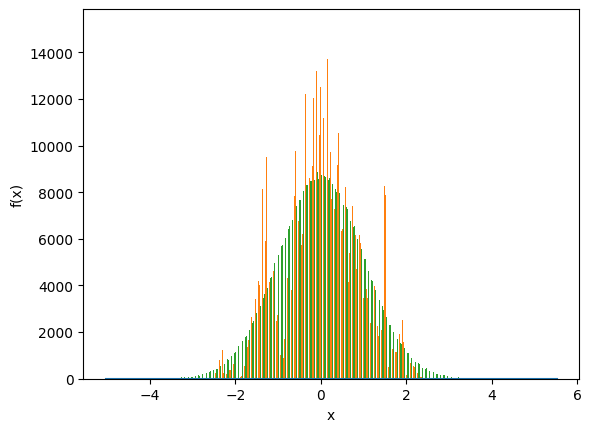

In [10]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [11]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.6669991612434387)  ACTUAL_STD == (0.10087636113166809)][ TARGET_MEAN == (0.0005698753520846367) TARGET_STD == (0.9979283213615417)]
Unit - (2): [ ACTUAL_MEAN == (-0.25694409012794495)  ACTUAL_STD == (0.06271827965974808)][ TARGET_MEAN == (-0.0038998350501060486) TARGET_STD == (0.9985398650169373)]
Overall network: [ACTUAL_MEAN == (0.010082745924592018)  ACTUAL_STD == (0.8776271939277649)]


## BIMODAL MIXTURE OF GAUSSIAN

In [12]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [13]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000015, epochs=15,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3595.17529296875.
- Epoch: 2) | KL Divergence value: 3425.372802734375.
- Epoch: 3) | KL Divergence value: 3263.780517578125.
- Epoch: 4) | KL Divergence value: 3111.09375.
- Epoch: 5) | KL Divergence value: 2967.83544921875.
- Epoch: 6) | KL Divergence value: 2834.353271484375.
- Epoch: 7) | KL Divergence value: 2710.830078125.
- Epoch: 8) | KL Divergence value: 2597.296875.
- Epoch: 9) | KL Divergence value: 2493.651123046875.
- Epoch: 10) | KL Divergence value: 2399.6728515625.
- Epoch: 11) | KL Divergence value: 2315.072509765625.
- Epoch: 12) | KL Divergence value: 2239.485595703125.
- Epoch: 13) | KL Divergence value: 2172.489013671875.
- Epoch: 14) | KL Divergence value: 2113.6484375.
- Epoch: 15) | KL Divergence value: 2062.521484375.


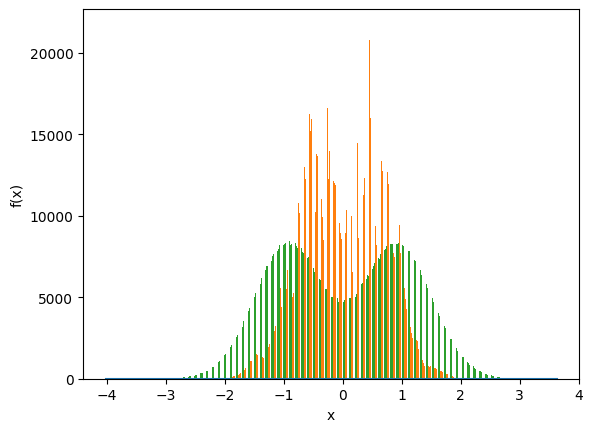

In [14]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [15]:
bimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.1377955973148346)  ACTUAL_STD == (0.09213447570800781)][ TARGET_MEAN == (-0.9056355357170105) TARGET_STD == (0.5855978727340698)]
Unit - (2): [ ACTUAL_MEAN == (0.4291909337043762)  ACTUAL_STD == (0.06146201491355896)][ TARGET_MEAN == (0.9211252927780151) TARGET_STD == (0.5699822902679443)]
Overall network: [ACTUAL_MEAN == (0.009826398454606533)  ACTUAL_STD == (0.6698372960090637)]


## EVAUALTUION IN ESN

In [16]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.reservoir.reset_initial_state()
ip_esn.reservoir.reset_initial_state()
bimodal_esn.reservoir.reset_initial_state()

simple_esn.reservoir.warm_up(X_TR[0:100])
ip_esn.reservoir.warm_up(X_TR[0:100])
bimodal_esn.reservoir.warm_up(X_TR[0:100])

simple_esn.train(X_TR[100:None], Y_TR[100:None], 0)
ip_esn.train(X_TR[100:None], Y_TR[100:None], 0)
bimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.26953125, 0.21679688, 0.22167969, ..., 0.27539062, 0.24804688,
       0.22753906], dtype=float32)

### COMPARISON ON TEST DATA

In [17]:
from Metrics import NRMSE, MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.023127151461666925


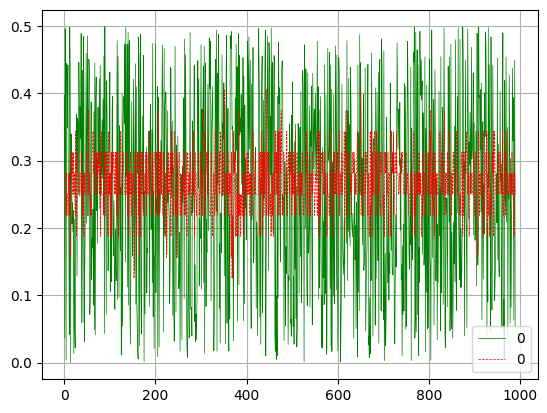

In [18]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022042503249230058


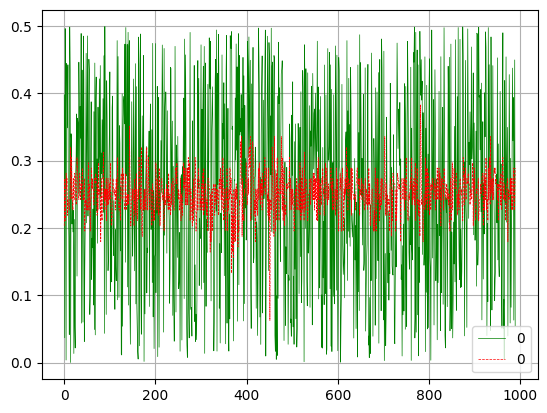

In [19]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021823903033015176


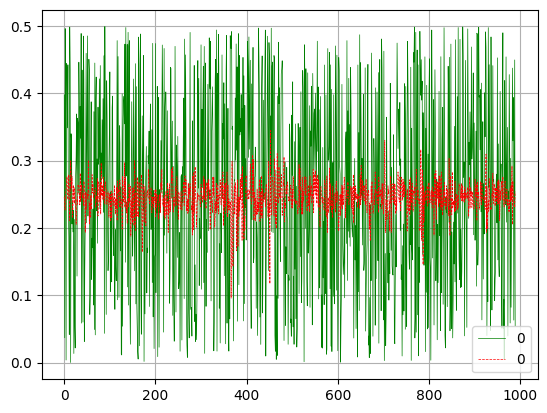

In [20]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

## LYAPUNOV EXPONENTS

In [ ]:
simple_esn.reservoir.LCE(X_TS)

-1.4083693

In [ ]:
ip_esn.reservoir.LCE(X_TS)

-1.1782687

In [ ]:
bimodal_esn.reservoir.LCE(X_TS)

-1.1294653

## MEMORY CAPACITY

In [23]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [24]:
mean_mc(simple_esn, 5)

tensor(6.7733)

In [25]:
mean_mc(ip_esn, 5)

tensor(11.0194)

In [26]:
mean_mc(bimodal_esn, 5)

tensor(10.9047)

## DEVIATION FROM LINEARITY

In [27]:
simple_esn.reservoir.de_fi()

0.3008154723050469


In [28]:
ip_esn.reservoir.de_fi()

0.716142669066522


In [29]:
bimodal_esn.reservoir.de_fi()

0.24255254143887495
